In [1]:
import torch
import torch.nn as nn
from src.model import LecunModel
from src.utils import display
from src.preprocess import load_data

In [2]:
# Model Parameters
batch_size = 32
# Model path
MODEL_PATH = "../models/lenet_mnist.pth"
# Load test dataset
_, _, test_dataloader = load_data(batch_size=batch_size, validation_split=0.2)

In [3]:
# Initialize the model
lecun = LecunModel()
lecun.load_state_dict(torch.load(MODEL_PATH, weights_only=True))
lecun.eval()
criterion = nn.CrossEntropyLoss()

## Model Evaluation on the Test Dataset

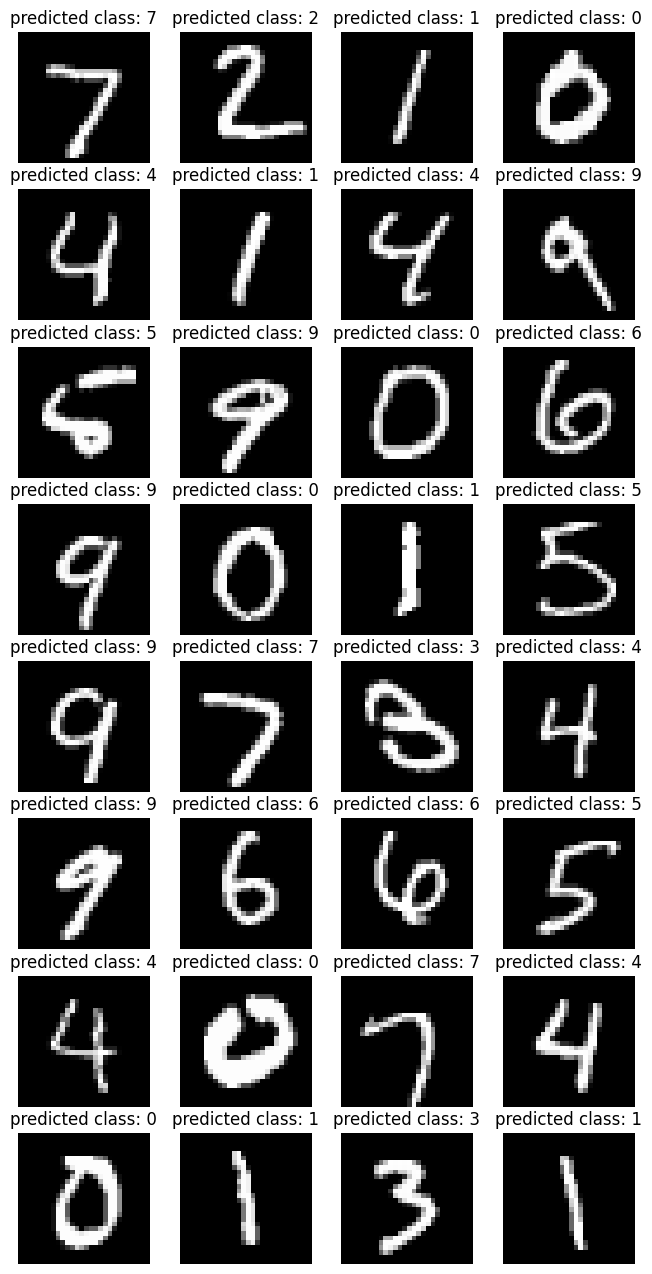

In [4]:
# We visualize the results for a batch of images and compare them to the ground truth.
data, target = next(iter(test_dataloader))
y_pred = lecun(data)
pred = y_pred.argmax(dim=1, keepdim=False)
display(data, pred)

In [5]:
# We evaluate the performance on the entire test dataset.
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_dataloader:
        output = lecun(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()   
test_loss /= len(test_dataloader)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_dataloader.dataset)} ({100. * correct / len(test_dataloader.dataset):.0f}%)\n')


Test set: Average loss: 0.0492, Accuracy: 9837/10000 (98%)

